## **Allan Deviation Plot Interpretation**

- **Flat Region**: White frequency noise (uncorrelated fluctuations, e.g., shot noise).
- **Downward Slope (-1/2)**: Averaging reduces noise, indicating flicker phase noise or thermal drift.
- **Upward Slope (+1/2 or more)**: Frequency drift (random walk behavior or systematic long-term drift).
- **Dip at Some \( \tau \)**: Optimal averaging time before noise starts accumulating.


In [1]:
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt
import pandas
import allantools

Text(0, 0.5, 'power (W)')

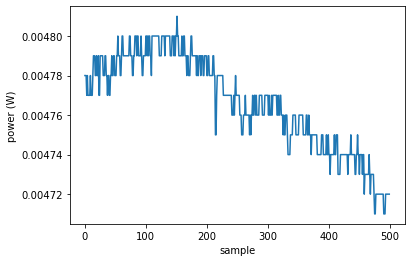

In [2]:
power_time_series = pandas.read_csv("test.csv")["power"]
plt.plot(power_time_series)
plt.xlabel("sample")
plt.ylabel("power (W)")

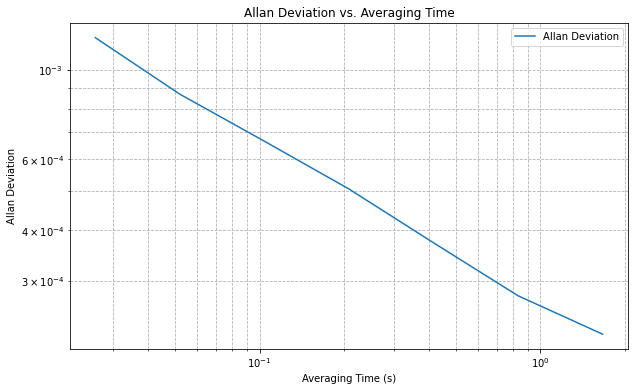

In [3]:
# Parameters
N = 500          # number of data points
dt = 13/500           # time step in seconds
time = np.arange(N) * dt

data = power_time_series

# Remove the mean to get a zero-mean signal (important for autocorrelation)
data_zero_mean = data - np.mean(data)

# Compute the autocorrelation function.
# Using np.correlate with mode='full'. The autocorrelation is symmetric,
# so we take the second half (lags >= 0).
autocorr_full = np.correlate(data_zero_mean, data_zero_mean, mode='full')
autocorr = autocorr_full[N-1:]

# Compute the Fourier transform of the autocorrelation to obtain the PSD.
psd_complex = np.fft.fft(autocorr)
psd = np.real(psd_complex)  # PSD should be real-valued (by the Wiener-Khinchin theorem)

# Create a frequency axis for the PSD.
freqs = np.fft.fftfreq(len(psd), d=dt)

# Since the autocorrelation is real and even, we only need the positive frequencies.
mask = freqs >= 0
freqs_pos = freqs[mask]
psd_pos = psd[mask]


freq_fluctuations = psd_pos  # Simulated frequency noise

# Compute Allan variance
taus, allan_var, _, _ = allantools.oadev(freq_fluctuations, rate=1/dt, data_type="freq")

# Plot Allan deviation
plt.figure(figsize=(10, 6))
plt.loglog(taus, np.sqrt(allan_var), label="Allan Deviation")
plt.xlabel("Averaging Time (s)")
plt.ylabel("Allan Deviation")
plt.title("Allan Deviation vs. Averaging Time")
plt.grid(True, which="both", linestyle="--")
plt.legend()
plt.show()

